In [3]:
import numpy as np
from scipy import stats

import scipy.stats
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import os
import matplotlib.font_manager as fm
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# 투샘플 티테스트

In [10]:
df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
print(shapiro(df1))
print(shapiro(df2))

(0.9094840288162231, 0.06230909377336502)
(0.8978105783462524, 0.03752673789858818)


In [11]:
#등분산성 검정
stats.levene(df1['sample'],df2['sample'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [28]:
#평균의 차이가 있다
#df2의 평균이 더 크다.
t_result = stats.ttest_ind(df1,df2, equal_var=True)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
print(t, p)

[-3.122] [0.003]


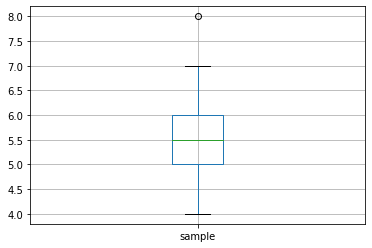

In [34]:
df1.boxplot()
# sns.boxplot(df1)
sns.boxplot(df1['sample'],df2['sample'])

# 투샘플 티테스트 실습

In [51]:
df1 = pd.DataFrame({'a':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]
                   ,'b':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})

#정규성을 띈다. 
print(shapiro(df1['a']))
print(shapiro(df1['b']))

(0.8425756096839905, 0.08004552870988846)
(0.7734811902046204, 0.014793740585446358)


In [48]:
#등분산성 검정, 등분산성을 띈다
stats.levene(df1['a'],df1['b'])

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

In [50]:
#평균의 차이가 없다. 
t_result = stats.ttest_ind(df1['a'],df1['b'], equal_var=True)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
print(t, p)

1.7 0.111


# Paired 티 테스트
귀무가설 : 짝을 이루는 평균의 차이가 있다.  
대립가설 : 작을 이루는 평균의 차이가 없다.  
p-값 0.이 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.  
평균의 차이가 없다.

In [54]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1,df2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t, p)

[-5.324] [0.]


# Paired 티 테스트
귀무가설 : 짝을 이루는 평균의 차이가 있다.  
대립가설 : 짝을 이루는 평균의 차이가 없다.  
p-값 0.05가 유의수준 0.05와 같기 때문에 분석자가 알아서 선택한다.

In [55]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})

t_result = stats.ttest_rel(df1,df2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t, p)

[-2.266] [0.05]


# proportion 테스트
귀무가설 : p=0.1  
대립가설 : p!=0.1

In [59]:
count = 15
n_obs = 100
value = 0.1
stat, pval = proportions_ztest(count, n_obs, value)
print(stat, pval)

1.4002800840280094 0.16142946236708322


귀무가설 : p=0.1  
대립가설 : p!=0.1  
회사의 오류가 발생할 확률이 0.1인데 1만개 중에서 오류가 1500개가 생겼는데  
이 비율은 같다고 할수있는가 ?

In [60]:
count = 1500
n_obs = 10000
value = 0.1
stat, pval = proportions_ztest(count, n_obs, value)
print(stat, pval)

14.002800840280093 1.4984678147052802e-44


100번 던져서 앞면이 40번 나왔다  
동전은 0.5 확률을 가지는데 이 확률이 같다고 할수있는가?  
귀무가설 : p=0.5  
대립가설 : p!=0.5  

     

In [63]:
count = 400
n_obs = 1000
value = 0.5
stat, pval = proportions_ztest(count, n_obs, value)
print(stat, pval)

-6.454972243679027 1.082387390934913e-10


# 2 proportion 테스트
귀무가설 : 두 집단의 불량률이 차이가 있다  
대립가설 : 두 집단의 불량률이 차이가 없다.

In [66]:
count = np.array([4,1])
nobs= np.array([1000,1200])
stat,pval = proportions_ztest(count, nobs)
print(stat, pval)

1.553109404737079 0.12039699966295712


In [68]:
count = np.array([40,10])
nobs= np.array([10000,12000])
stat,pval = proportions_ztest(count, nobs)
print(stat, pval)

4.911363174397475 9.044539007262803e-07


## 데이터가 연속형일때는 독립성 x   데이터가 이산형일때는 독립성 검정을 한다

# 카이스퀘어 검정  
적합도 검정은 단측 검정이다  
귀무가설 : 근무조별로 제품을 생산하는 부하는 차이가 없다.  
대립가설 : 근무조별로 제품을 생산하는 부하의 차이가 있다.


In [4]:
import pandas as pd
df = pd.DataFrame({'hsg':[270,260,236,234],'ss':[228,285,225,262],'spa':[277,284,231,208]})
# chi, pval , dof , expected = stats.chi2_contingency(df.T) # 전치 행렬로 열을 집어 넣는게 포인트임 !
df.T
# print(chi,pval,dof,expected)

,0,1,2,3
hsg,270,260,236,234
ss,228,285,225,262
spa,277,284,231,208


귀무가설 : 각 제품에 대해 이미지에 대해 차이가 없다.  
대립가설 : 각 제품에 대해 이미지에 대해 차이가 있다.

In [72]:
df = pd.DataFrame({'A/S':[18,8,4,4,3,3],'가격':[1,2,1,1,1,25],'성능':[8,14,3,2,3,8],'확장성':[7,5,4,3,1,10],'디자인':[10,5,9,2,1,2],'안정성':[9,9,5,7,1,1],'기능성':[10,4,4,3,1,7]})
chi, pval , dof , expected = stats.chi2_contingency(df.T) # 전치 행렬로 열을 집어 넣는게 포인트임 !

print(chi,pval,dof,expected)

98.27432228716901 3.4707443967367854e-09 30 [[11.00436681  8.20960699  5.24017467  3.84279476  1.92139738  9.78165939]
 [ 8.52838428  6.36244541  4.06113537  2.97816594  1.48908297  7.58078603]
 [10.45414847  7.79912664  4.97816594  3.65065502  1.82532751  9.29257642]
 [ 8.25327511  6.15720524  3.930131    2.88209607  1.44104803  7.33624454]
 [ 7.97816594  5.95196507  3.79912664  2.7860262   1.3930131   7.09170306]
 [ 8.80349345  6.56768559  4.19213974  3.07423581  1.5371179   7.82532751]
 [ 7.97816594  5.95196507  3.79912664  2.7860262   1.3930131   7.09170306]]


# One way Anova

In [83]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],'B':[721,821,910,678,723,790,711,790,745,891]
                  ,'C':[621,915,888,721,894,834,841,912,845,889]})
df.boxplot(['A','B','C'])

f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print(f, p)

     A    B    C
0  892  721  621
1  623  821  915
2  721  910  888
3  678  678  721
4  723  723  894
5  790  790  834
6  720  711  841
7  670  790  912
8  690  745  845
9  771  891  889
4.263 0.025


# 상관분석
귀무가설 = 상관이 없다. 0이다  
대립가설 = 상관이 있다. 0이아니다

결과적으로 두 집단은 강한 양의 상관관계를 갖는것으로 판단 할 수 있다.

In [81]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr,pval = stats.pearsonr(df1,df2)

print(corr, pval)

0.9892262536728126 5.818608669347627e-08


# 회귀분석


In [4]:
x = [-3,-2,-1,0,1,2,3]
y=[0.4,1.3,2.2,2.5,2.4,2.0,1.5]
x = sm.add_constant(x) # 절편 만드는거 ?
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.729
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.246
Time:                        17:44:19   Log-Likelihood:                -6.3003
No. Observations:                   7   AIC:                             16.60
Df Residuals:                       5   BIC:                             16.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7571      0.266      6.602      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


(0.8914536833763123, 0.28233224153518677)

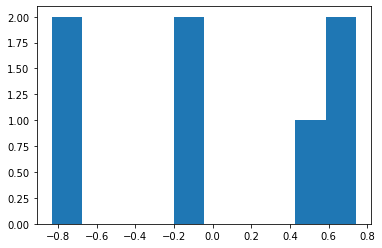

In [5]:
#정규성 검정
plt.hist(result.resid)
shapiro(result.resid)

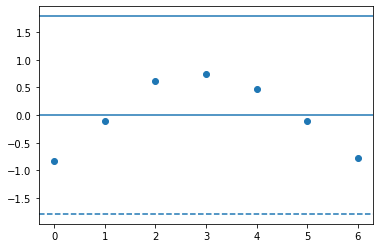

In [7]:

#독립성 검정
plt.scatter(range(0,7),result.resid ,marker="o")
plt.axhline(y=0, linestyle ='-')
plt.axhline(y=3*np.std(result.resid), linestyle ='-')
plt.axhline(y=-3*np.std(result.resid), linestyle ='--')

In [84]:
minutes = [1,2,3,4,4,5,6,6,7,8]
units = [23,29,49,64,74,87,96,97,109,119]

minutes = sm.add_constant(minutes) # 절편 만드는거 ?
model = sm.OLS(units, minutes)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.82e-08
Time:                        15:34:58   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# 잔차 검정

(0.9653438329696655, 0.8446419835090637)

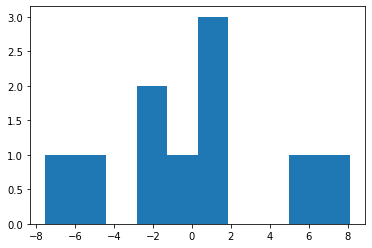

In [97]:
#정규성 검정
plt.hist(result.resid)
shapiro(result.resid)

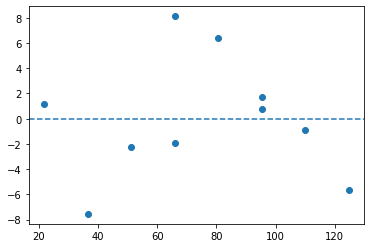

In [101]:
#둥분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.axhline(y=0,linestyle='--')


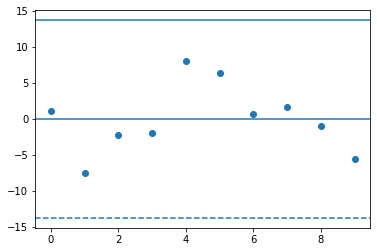

In [102]:

#독립성 검정
plt.scatter(range(0,10),result.resid ,marker="o")
plt.axhline(y=0, linestyle ='-')
plt.axhline(y=3*np.std(result.resid), linestyle ='-')
plt.axhline(y=-3*np.std(result.resid), linestyle ='--')


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model = smf.ols(formula="strength ~ Oven_TMP",data = ds_reg)
result = model.fit()
print(result.summary())